<h1 style="color:rgb(0,120,170)"> Gaussian Classifier, Bias-Variance Decomposition, Evaluation Measures </h1>

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import random
%matplotlib inline  

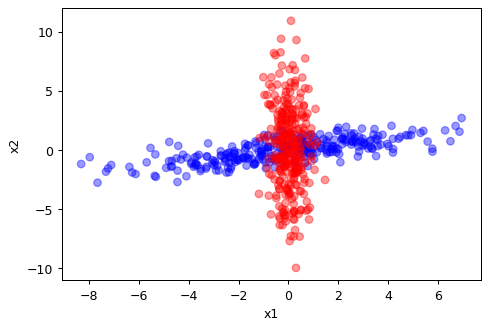

In [2]:
# read data, split into X (features) and y (labels)
Z = np.genfromtxt('normal.csv', delimiter=',')
X, y = Z[:,:-1], Z[:,-1]

colormap = {1.0:'blue', -1.0:'red'}
y_colors = [colormap[i] for i in y]
fig = plt.figure(dpi=90)
plt.xlabel('x1')
plt.ylabel('x2')

plt.scatter(x=X[:,0], y=X[:,1], c=y_colors, alpha=0.4)

plt.show()

<h3 style="color:rgb(210,90,80)">1.2. Code (6 points):</h3>

In [15]:
"""
Function that estimates the means and covariance matrices from the given data as well as the probability to encounter
a positive/negative example respectively
@param X_, np ndarray, data matrix
@param y_, np ndarray, data vector
"""
def est_mean_cov(X_,y_):
    X_pos = X_[y_ == 1]
    X_neg = X_[y_ == -1]
    meanXpos, meanXneg = np.mean(X_pos, axis=0).reshape((1,2)),np.mean(X_neg, axis=0).reshape((1,2))
    covXpos,covXneg = np.cov(X_pos.T),np.cov(X_neg.T)
    p_yneg = np.count_nonzero(y_ == -1)/len(y_)
    p_ypos = np.count_nonzero(y_ == 1)/len(y_)
    return (covXpos, meanXpos, float(p_ypos), covXneg, meanXneg, float(p_yneg))

covXpos, meanXpos, p_ypos, covXneg, meanXneg, p_yneg = est_mean_cov(X,y)

# print corresponding values
print("Positive class (blue):\n")
print("Covariance:")
print(pd.DataFrame(covXpos,columns=["x1","x2"],index=["x1","x2"]),"\n")
print("Mean = ", meanXpos, "\n")
print("p(y=+1) =", p_ypos, "\n\n")
print("Negative class (orange):\n")
print("Covariance:")
print(pd.DataFrame(covXneg,columns=["x1","x2"],index=["x1","x2"]),"\n")
print("Mean =", meanXneg, "\n")
print("p(y=-1) =", p_yneg, "\n")

Positive class (blue):

Covariance:
          x1        x2
x1  8.442267  2.017815
x2  2.017815  0.953326 

Mean =  [[-0.14820707 -0.03790113]] 

p(y=+1) = 0.5 


Negative class (orange):

Covariance:
          x1         x2
x1  0.198607  -0.161064
x2 -0.161064  12.553366 

Mean = [[0.0340324  0.16727881]] 

p(y=-1) = 0.5 



<h3 style="color:rgb(210,90,80)">2.1 Code (10 points):</h3>

In [16]:
"""
These functions should contain the calculations for the respective parameters and return the result.
@param covXpos, np ndarray, covariance matrix of positive examples
@param meanXpos, np ndarray, mean of positive examples
@param covXneg, np ndarray, covariance matrix of negativ examples
@param meanXneg, np ndarray, mean of negative examples
@param p_ypos, float, probability of encountering a positive example
@param p_yneg, float, probability of encountering a negative example
Hint: You may want to check out np.linalg.inv
"""


def calc_par_A(covXpos, meanXpos, covXneg, meanXneg, p_ypos, p_yneg):
    return np.linalg.inv(covXpos) - np.linalg.inv(covXneg)

def calc_par_b(covXpos, meanXpos, covXneg, meanXneg, p_ypos, p_yneg):
    return meanXpos @ np.linalg.inv(covXpos) - meanXneg @ np.linalg.inv(covXneg)   

def calc_par_c(covXpos, meanXpos, covXneg, meanXneg, p_ypos, p_yneg):
    return float((-0.5*meanXpos @ np.linalg.inv(covXpos) @ meanXpos.T) + (0.5*meanXneg @ np.linalg.inv(covXneg) @ meanXneg.T) + (-0.5 * np.log(np.linalg.det(covXpos))) + (0.5 * np.log(np.linalg.det(covXneg))) + (np.log(p_ypos)) - (np.log(p_yneg)))

"""
Combine the previously calculated parameters to the optimal classification function g.
@param points, np.array, the points that the function g should be applied to
"""
def calc_func_g(par_A, par_b, par_c, points):
    func_g = []
    for point in points:
        func_g.append((-0.5*np.dot(np.dot(point,par_A),point.T)) + np.dot(par_b,point.T) + par_c)    
    return np.array(func_g)


# some code that should help you
X1, X2 = np.mgrid[-10.5:10.5:500j, -10.5:10.5:500j]
points = np.c_[X1.ravel(), X2.ravel()]
    
par_A = calc_par_A(covXpos, meanXpos, covXneg, meanXneg, p_ypos, p_yneg)
par_b = calc_par_b(covXpos, meanXpos, covXneg, meanXneg, p_ypos, p_yneg)
par_c = calc_par_c(covXpos, meanXpos, covXneg, meanXneg, p_ypos, p_yneg)
func_g = calc_func_g(par_A, par_b, par_c, points)

print(f' Values for A: \n {par_A}'
      f' \n Values for b: \n {par_b}'
      f' \n Values for c: \n {par_c}')
# print the values shapes of par_A, par_b, and par_c here
#print(par_A,par_b,par_c,func_g)

 Values for A: 
 [[-4.84827549 -0.57269559]
 [-0.57269559  2.04245844]] 
 Values for b: 
 [[-0.2003753  -0.02094713]] 
 Values for c: 
 -0.2355324071310293


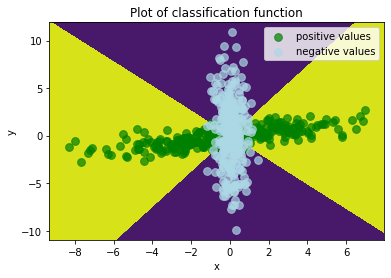

In [17]:
# your code for the visualization
def classifier(x):
    return np.sign(calc_func_g(par_A, par_b, par_c,x))

X_pos = X[y == 1]
X_neg = X[y == -1]
# y_pos = y[:300]
# y_neg = y[300:]
y_pos = y[y==1]
y_neg = y[y== -1]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
zeta = np.column_stack((xx.ravel(), yy.ravel()))
classified = classifier(zeta).reshape(xx.shape)

plt.contourf(xx, yy, classified)
plt.scatter(X_pos[:, 0], X_pos[:, 1], c='green', s=60, label='positive values', alpha=0.7)
plt.scatter(X_neg[:, 0], X_neg[:, 1], c='lightblue', s=60, label='negative values', alpha=0.7)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Plot of classification function')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()





$$\begin{align} \mathrm{EPE}(\mathbf{x}_0) = \mathrm{E}_{y\mid
\mathbf{x}_0}\Big(\mathrm{E}_{Z_l}\big((y-g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2\big)\Big)\quad \end{align}$$
$$\begin{align} = \mathrm{E}_{y\mid \mathbf{x}_0}\Big( \mathrm{E}_{Z_l} (y^2) -2 \ast y \ast \mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l))) + \mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2 \Big)\end{align} $$
$$\begin{align} = \mathrm{E}_{y\mid \mathbf{x}_0}\Big( \mathrm{E}_{Z_l} (y^2) \Big) -2*\mathrm{E}_{y\mid \mathbf{x}_0}\Big( y*\mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l))) \Big) + \mathrm{E}_{y\mid \mathbf{x}_0}\Big( \mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2 \Big)\end{align}$$




$$\begin{align} \operatorname{Var}(y\!\mid\!\mathbf{x}_0) = \mathrm{E}_{y\mid \mathbf{x}_0}(y^2) -  \mathrm{E}_{y\mid \mathbf{x}_0}(y)^2 \end{align} $$


$$ \begin{align}\Big( \mathrm{E}_{y\mid \mathbf{x}_0}(y) - \mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l))) \Big)^2 = \mathrm{E}_{y\mid \mathbf{x}_0}(y)^2 - 2*\mathrm{E}_{y\mid \mathbf{x}_0}(y)* \mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l))) + \mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2 \end{align}$$


$$
\begin{align}
\mathrm{E}_{Z_l} \Bigg( \Big(g(\mathbf{x}_0;\mathbf{w}(Z_l))-\mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))\Big)^2 \Bigg) = \\
\mathrm{E}_{Z_l} \Bigg( g(\mathbf{x}_0;\mathbf{w}(Z_l))^2 - 2*g(\mathbf{x}_0;\mathbf{w}(Z_l)*\mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))) + \mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2 \Bigg) = \\
\mathrm{E}_{Z_l} \Big( g(\mathbf{x}_0;\mathbf{w}(Z_l))^2 \Big) -2*\mathrm{E}_{Z_l} \Big( g(\mathbf{x}_0;\mathbf{w}(Z_l)*\mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))) \Big) + \mathrm{E}_{Z_l} \Big( \mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2 \Big)\end{align}
$$

<h2 style="color:rgb(0,120,170)"> Bias-variance decomposition for regression (40 points)</h2>

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


np.random.seed(14)

def pol_reg_pred(X_train,y_train,X_test,m):
    poly_reg = PolynomialFeatures(m)
    X_poly_train = poly_reg.fit_transform(X_train.reshape(-1, 1))
    X_poly_test= poly_reg.fit_transform(X_test.reshape(-1, 1))
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)
    y_pred = lin_reg.predict(X_poly_test)
    return y_pred

def f(x):
    return 0.6 * x**4 + 2 * x**3 - 8 * x**2


def create_train_X(k,l):
    return np.random.uniform(low=-1, high=3, size=(k, l))
    
def create_train_y(k,l,X_train):
    return f(X_train) + np.random.normal(0,0.09, size=(k,l))

k = 200
l = 20
M = 11
X_train = create_train_X(k,l)
y_train = create_train_y(k,l,X_train)
test_set = np.array([1.8])
def bias_var(X_train,y_train): 
    x0 = np.array([1.8])
    sqbias = []
    variance = []
    predictions = []
    for m in range(M):
        predictions = []
        for i,elem in enumerate(X_train):
            prediction = pol_reg_pred(elem,y_train[i],test_set,m+1)
            predictions.append(prediction)
        exp = np.mean(predictions)
        sqbias.append((f(x0)-exp)**2)
        variance.append(np.mean((predictions-exp)**2))
    return (sqbias,variance)  
sqbias, variance = bias_var(X_train,y_train)
print(X_train.shape,y_train.shape)
print(sqbias)
print(variance)

(200, 20) (200, 20)
[array([74.03235701]), array([32.89593601]), array([0.06724866]), array([1.38787662e-05]), array([3.96819464e-05]), array([0.00011991]), array([0.00045402]), array([5.87172525e-05]), array([0.00059329]), array([1.61673802e-06]), array([0.01980527])]
[9.185224679420427, 4.196797215971417, 0.1222732491033057, 0.001671619379303258, 0.002270284367386312, 0.004399004867716144, 0.019347582096724113, 0.06444628686815163, 0.18327793484483876, 0.21264822312055986, 3.3204865023058567]


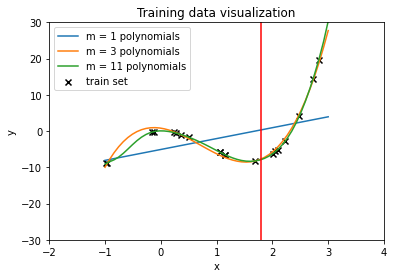

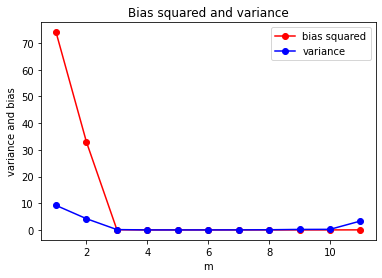

In [21]:

x_vals = np.linspace(-1, 3)
m = [1,3,11]
def datapoints_plot(train_set,y_set,m,n_samples = 20):
    for e,k in enumerate(m):
        for i in range(n_samples):
            if train_set.ndim == 1 and y_set.ndim == 1:
                x = train_set
                y = y_set
            else:
                x= train_set[0, :]
                y = y_set[0, :]
            regr = np.poly1d(np.polyfit(x,y,k))
        plt.plot(x_vals, regr(x_vals), label=f'm = {k} polynomials')
    plt.scatter(x=train_set, y=y_set, color='k', label='train set', marker='x')
    plt.legend()
    plt.title(f'Training data visualization')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(-30, 30)
    plt.xlim(-2,4)
    plt.axvline(x=1.8, color='r')
    plt.show()

datapoints_plot(X_train[0],y_train[0],m,l)

#visualize squared bias and variance
#==============================================#

#sqbias, variance = bias_var(X_train,y_train)
m_coefs = [m+1 for m in range(11)]
plt.title('Bias squared and variance')
plt.plot(m_coefs, sqbias, color='r', linestyle='solid', marker='o', label='bias squared')
plt.plot(m_coefs, variance, color='b', linestyle='solid', marker='o', label='variance')
plt.xlabel('m')
plt.ylabel('variance and bias')
plt.legend()
plt.show()


* <b>Reminder:</b> Confusion Matrix structure:

$$
\begin{array}{|c|c|c|}
\hline
 &\bar g(x)=+1  & \bar g(x)=-1\\
 \hline
 y=+1 & \text{TP}  & \text{FN} \\
 \hline
 y=-1 & \text{FP} & \text{TN} \\
\hline
\end{array}
$$

In [22]:
# confusion matrix
_TP = 4
_TN = 4
_FP = 1
_FN = 2

# evaluation measures
def evaluate_measures(TP,TN,FP,FN): 
    P = TP+FN
    N = TN+FP
    ACC = (TP+TN)/(TP+TN+FP+FN)
    TPR = TP/P
    FPR = FP/N
    FNR = FN/P
    TNR = TN/N
    PREC = TP/(TP+FP)
    BACC = (TPR+TNR)/2
    F1 = 2*((PREC*TPR)/(PREC+TPR))

    return (ACC,TPR,TNR,FPR,FNR,PREC,BACC,F1)
    
_ACC,_TPR,_TNR,_FPR,_FNR,_PREC,_BACC,_F1 = evaluate_measures(_TP,_TN,_FP,_FN)

print("ACC: {:.3f}\nTPR: {:.3f}\nTNR: {:.3f}\nFPR: {:.3f}\nFNR: {:.3f}\nPREC: {:.3f}\nBACC: {:.3f}\nF1: {:.3f}".format(_ACC,_TPR,_TNR,_FPR,_FNR,_PREC,_BACC,_F1))

ACC: 0.727
TPR: 0.667
TNR: 0.800
FPR: 0.200
FNR: 0.333
PREC: 0.800
BACC: 0.733
F1: 0.727


In [3]:
"""
This function should return the desired probability. 
@param spec, float, specificity
@param sens, float, sensitivity
@param pop, int, population
@param inf, int, infected
"""
def calc_prob(spec,sens,pop,inf):
    population = pop
    infected = inf
    # TN = (spec*(population-infected))//1
    # FP = (population-infected)-TN
    # FPR = FP/(TN+FP)
    # return round(FPR,3)*100
    TN = (spec*(population-infected))//1
    FP = (population-infected)-TN
    PREC = (infected)/((infected)+FP)

    res = round(1-PREC,3)
    return '{:.2%}'.format(res)

    
_result = calc_prob(0.97,0.98,1000,50)
print("The probability that a person who is tested positive is in fact not infected is {}".format(_result))

The probability that a person who is tested positive is in fact not infected is 36.70%


In [24]:
# executability check
est_mean_cov(X,y)
calc_par_A(np.eye(2),np.ones(shape=2),np.eye(2),np.ones(shape=2),1,1)
calc_par_b(np.eye(2),np.ones(shape=2),np.eye(2),np.ones(shape=2),1,1)
calc_par_c(np.eye(2),np.ones(shape=2),np.eye(2),np.ones(shape=2),1,1)
calc_func_g(np.ones(shape=(2,2)),np.ones(2),1,np.ones(shape=(250000,2)))
create_train_X(1,1)
create_train_y(1,1,np.ones((200,20)))
bias_var(np.ones((200,20)),np.ones((200,20)))
evaluate_measures(1,1,1,1)
calc_prob(1,1,1,1)
print("Executable")

Executable
